# Iman Noor

___


# **Task 20-> Feature Engineering:**

Feature engineering is the process of using domain knowledge to select, modify, or create new features (variables) that make machine learning algorithms work better. It is one of the most critical steps in building effective machine-learning models because it directly influences the model's ability to learn and make accurate predictions.

Key steps in feature engineering include:

1. **Feature Selection:** Identifying the most relevant features that contribute to the model's accuracy.
2. **Feature Transformation:** Applying mathematical transformations to features to improve the model's performance.
3. **Feature Creation:** Creating new features from existing data to provide more information to the model.

___


# Task 1: Feature Selection
1. **Objective:** Identify the most relevant features from a dataset.
2. **Dataset:** Use a sample dataset like the Titanic or Iris datasets.
3. **Steps:**
    - Load the dataset.
    - Analyze the correlation between features and the target variable.
    - Use methods like mutual information or chi-squared test to select important features.
    - Document the selected features and explain why they were chosen.


**feature variable** --> 
Pclass
Sex
Age
SibSp
Parch
Fare
Embarked

**target variable** --> survived


## 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2, VarianceThreshold, f_classif 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, SelectFromModel

In [2]:
titanic = pd.read_csv('titanic.csv')
df = titanic.copy() # making copy of dataset to avoid conflicts
df_expr = titanic.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking the null ones
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Filling the missing values
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns that won't be used for prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [6]:
# Manually converting 'Sex' and 'Embarked' column into binary
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'Q':0,'S':1,'C':2})

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,1
1,1,1,1,38,1,0,71.2833,2
2,1,3,1,26,0,0,7.9250,1
3,1,1,1,35,1,0,53.1000,1
4,0,3,0,35,0,0,8.0500,1


## 2. Analyze the correlation between features and the target variable.
There are many methods to analyze the correlation between features and target variable such as:
- Correlation matrix
- Correlation coefficient

We will go through each method for our better understanding
- Correlation matrix

In [8]:
correlation_matrix = df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.067809,-0.035322,0.081629,0.257307,0.125953
Pclass,-0.338481,1.000000,-0.131900,-0.335071,0.083081,0.018443,-0.549500,-0.305762
Sex,0.543351,-0.131900,1.000000,-0.082533,0.114631,0.245489,0.182333,0.022521
Age,-0.067809,-0.335071,-0.082533,1.000000,-0.232743,-0.176744,0.093856,0.034974
SibSp,-0.035322,0.083081,0.114631,-0.232743,1.000000,0.414838,0.159651,-0.030874
Parch,0.081629,0.018443,0.245489,-0.176744,0.414838,1.000000,0.216225,0.035957
Fare,0.257307,-0.549500,0.182333,0.093856,0.159651,0.216225,1.000000,0.268865
Embarked,0.125953,-0.305762,0.022521,0.034974,-0.030874,0.035957,0.268865,1.000000


- **Correlation coefficient**
    - `.corr()` is used to directly calculate correlation between two specific variables
    - It can also be visualized as shown below

In [9]:
correlation = df['Sex'].corr(df['Survived'])
print(f"Correlation between Age and Survived: {correlation}")

Correlation between Age and Survived: 0.5433513806577546


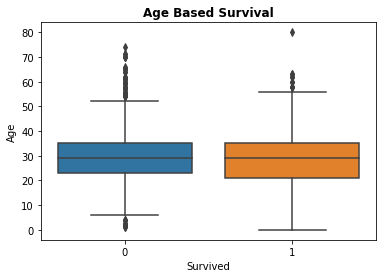

In [10]:
sns.boxplot(x=df['Survived'], y=df['Age'])
plt.title('Age Based Survival', weight='bold');

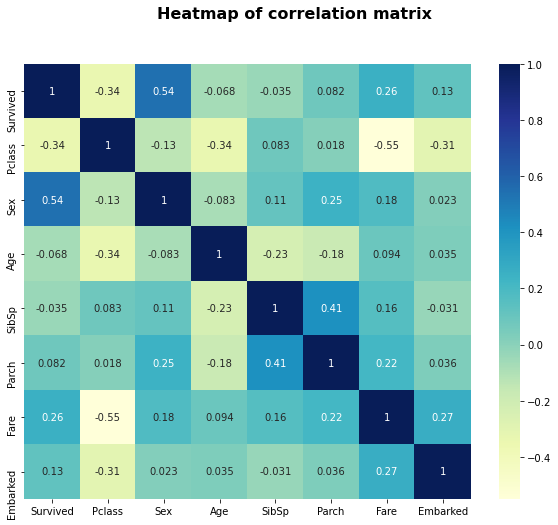

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
fig.suptitle('Heatmap of correlation matrix', weight='bold', fontsize=16)
plt.show();

## 3.  Use methods like mutual information or chi-squared test to select important features.

Mutual Information measures the entropy drops under the condition of the target value.

## Mutual Information

### Splitting Data

In [12]:
X = df.drop(columns='Survived')
y = df['Survived']
# Computing mutual information
m_scores = mutual_info_classif(X, y, random_state=42)
m_scores_series = pd.Series(m_scores, index=X.columns)
print('Mutual Information Scores: \n', m_scores_series.sort_values(ascending=False))

Mutual Information Scores: 
 Sex         0.158139
Fare        0.136075
Pclass      0.060407
SibSp       0.024934
Parch       0.012123
Age         0.000000
Embarked    0.000000
dtype: float64


## Chi-Squared Test

In [13]:
# Selecting top 3 features using ch-sq test
s = SelectKBest(chi2, k=3)
s.fit(X, y)

# Selected features 
s_features = s.get_support(indices=True)
print('Top 3 selected features using chi-squared test:\n', X.columns[s_features])

Top 3 selected features using chi-squared test:
 Index(['Pclass', 'Sex', 'Fare'], dtype='object')


## 4. Document the selected features and explain why they were chosen.
### Documentation of Selected Features

1. **Pclass (Passenger Class)**
   - **Description:** This feature represents the passenger's class (1st, 2nd, or 3rd).
   - **Reason for Selection:** The survival rates varied significantly across different classes, with higher-class passengers having a better chance of survival. This strong association makes `Pclass` a crucial predictor of survival.

2. **Sex**
   - **Description:** This feature indicates the gender of the passenger (male or female).
   - **Reason for Selection:** Gender was a critical factor in survival rates, with women having a higher likelihood of survival due to the "women and children first" policy during the evacuation. This significant impact on the survival outcome makes `Sex` an essential feature.

3. **Fare**
   - **Description:** This feature represents the fare paid by the passenger for the voyage.
   - **Reason for Selection:** The fare is often correlated with the passenger class and, consequently, the survival probability. Higher fares typically indicate higher-class cabins, which were closer to lifeboats and had better access during the evacuation.


# Task 2: Feature Transformation

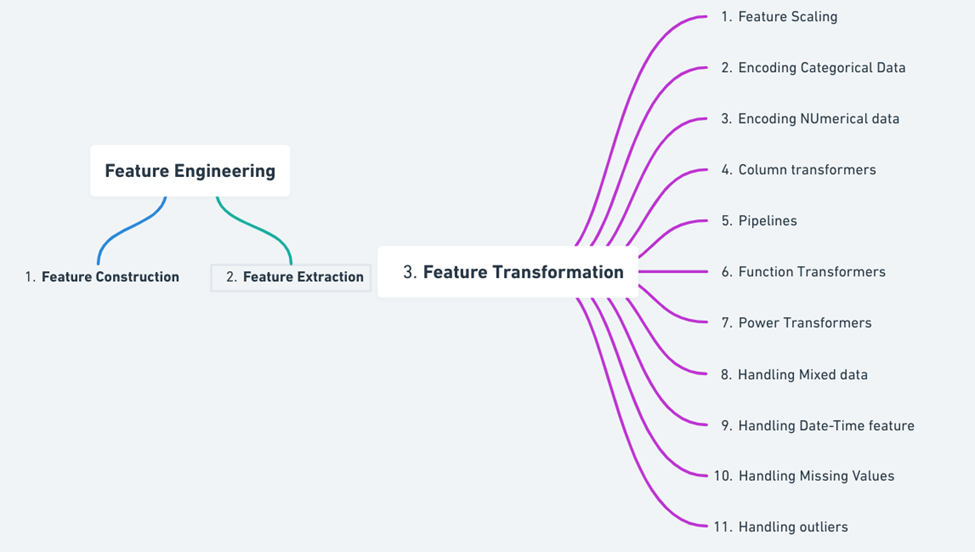

1. **Objective:** Apply transformations to existing features to improve model performance.
2. **Dataset:** Use the same dataset as Task 1.
3. **Steps:**
    - Load the dataset.
    - Apply transformations such as log transformation, normalization, or standardization.
    
## **Log transformation**
Log transformation is a data transformation method in which it replaces each variable x with a log(x). 

In [14]:
df_log = np.log(df)
df_log = pd.DataFrame(data=df_log, columns=df.columns)
df_log.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-inf,1.098612,-inf,3.091042,0.0,-inf,1.981001,0.000000
1,0.0,0.000000,0.0,3.637586,0.0,-inf,4.266662,0.693147
2,0.0,1.098612,0.0,3.258097,-inf,-inf,2.070022,0.000000
3,0.0,0.000000,0.0,3.555348,0.0,-inf,3.972177,0.000000
4,-inf,1.098612,-inf,3.555348,-inf,-inf,2.085672,0.000000


## **Max-Min Normalization**
This technique is to re-scales features with a distribution value between 0 and 1. 

For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1.

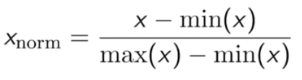

In [15]:
scr = MinMaxScaler()
scr.fit(df)
scaled_features = scr.transform(df)
df_MinMax = pd.DataFrame(data=scaled_features, columns=df.columns)
df_MinMax.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0.0,0.2750,0.125,0.0,0.014151,0.5
1,1.0,0.0,1.0,0.4750,0.125,0.0,0.139136,1.0
2,1.0,1.0,1.0,0.3250,0.000,0.0,0.015469,0.5
3,1.0,0.0,1.0,0.4375,0.125,0.0,0.103644,0.5
4,0.0,1.0,0.0,0.4375,0.000,0.0,0.015713,0.5


## **Standardization**
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively. The equation is shown below:

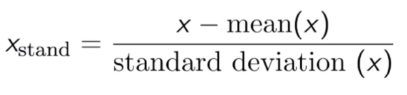

In [16]:
scaler = StandardScaler()
scaler = scaler.fit_transform(df)
scaler = pd.DataFrame(data=scaler, columns=df.columns)
scaler.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.789272,0.827377,-0.737695,-0.580044,0.432793,-0.473674,-0.502445,-0.198572
1,1.266990,-1.566107,1.355574,0.650112,0.432793,-0.473674,0.786845,1.745685
2,1.266990,0.827377,1.355574,-0.272505,-0.474545,-0.473674,-0.488854,-0.198572
3,1.266990,-1.566107,1.355574,0.419458,0.432793,-0.473674,0.420730,-0.198572
4,-0.789272,0.827377,-0.737695,0.419458,-0.474545,-0.473674,-0.486337,-0.198572


# Task 3: Feature Creation
1. **Objective:** Create new features from existing data.
2. **Dataset:** Use the same dataset as Task 1.
3. **Steps:**
    - Load the dataset.
    - Create new features by combining or modifying existing ones (e.g., creating an interaction term, extracting date features, etc.).

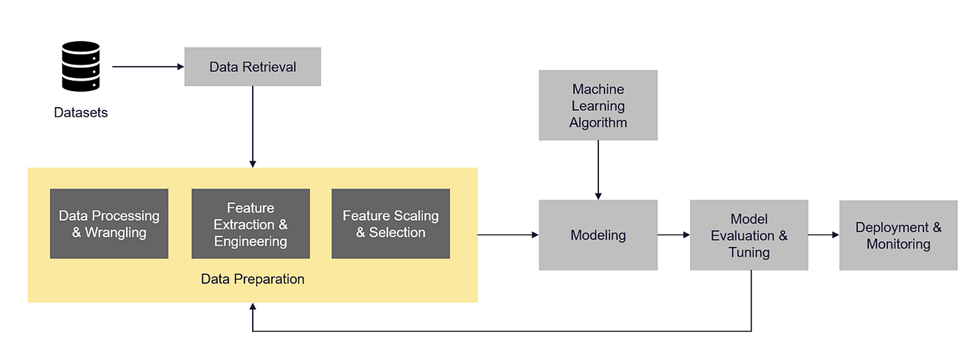

### - Creating an interaction term

In [17]:
df['Age_Fare_Interaction'] = df['Age']*df['Fare']
columns_to_display = ['Survived', 'Age_Fare_Interaction']
df_subset = df[columns_to_display]
df_subset.head()

,Survived,Age_Fare_Interaction
0,0,159.5000
1,1,2708.7654
2,1,206.0500
3,1,1858.5000
4,0,281.7500


### - Binning Numeric Variables

In [18]:
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
columns_to_display = ['Survived','Age_Category', 'Age_Fare_Interaction']
df_subset = df[columns_to_display]
df_subset.head()

,Survived,Age_Category,Age_Fare_Interaction
0,0,Young Adult,159.5000
1,1,Adult,2708.7654
2,1,Young Adult,206.0500
3,1,Adult,1858.5000
4,0,Adult,281.7500


# Task 4: Polynomial Features
1. **Objective:** Generate polynomial features to capture non-linear relationships.
2. **Dataset:** Use a dataset with numerical features, such as the Boston housing dataset.
3. **Steps:**
    - Load the dataset.
    - Use the `PolynomialFeatures` class from `sklearn.preprocessing` to generate polynomial features.

*We can also take dataset from kaggle but here I loaded this dataset using sklearn.datasets*

In [19]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
print(f"Shape of data: {data.shape}")
print(f"Feature names: {feature_names}")
df_boston = pd.DataFrame(data, columns=feature_names)
df_boston.head()

Shape of data: (506, 13)
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False)
data_poly = poly.fit_transform(data)
df_poly = pd.DataFrame(data_poly, columns=poly.get_feature_names(feature_names))
print('Polynomial Feature Dataset:\n')
df_poly.head()

Polynomial Feature Dataset:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


# Task 5: Handling Categorical Features
1. **Objective:** Convert categorical features into numerical features.
2. **Dataset:** Use a dataset with categorical features, such as the Titanic dataset.
3. **Steps:**
    - Load the dataset.
    - Apply encoding techniques like one-hot encoding, label encoding, or target encoding.

- **One-Hot Encoding:** Great for many categories, creates new binary features (1 for the category, 0 for others).
- **Label Encoding:** Simple, assigns a number to each category, but assumes order matters (which might not be true).
- **Ordinal Encoding:** Similar to label encoding, but only use it if categories have a natural order (like low, medium, high).


### - **One-Hot Encoding:**

In [21]:
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


> The `drop_first=True` parameter avoids multicollinearity by dropping the first category, which acts as the baseline.

### - Label Encoding or Ordinal Encoding

In [22]:
label_encoder = LabelEncoder()
df_expr['Sex'] = label_encoder.fit_transform(df_expr['Sex'])
df_expr['Embarked'] = label_encoder.fit_transform(df_expr['Embarked'])
df_expr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


### Notes:
   - **LabelEncoder** vs. **OrdinalEncoder:** 
      - Use `LabelEncoder` when the categorical variable does not have an intrinsic order (nominal data).
      - Use `OrdinalEncoder` when the categorical variable has an inherent order (ordinal data), and you want to specify the order explicitly.

*So, here I used label encoding*

# Practice Questions

## Variance Threshold

In [23]:
v_thresh = VarianceThreshold(threshold=0.5)
v_thresh.fit(X)
X_v_thresh = X.loc[:, v_thresh.get_support()]
X_v_thresh.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7.2500
1,1,38,1,0,71.2833
2,3,26,0,0,7.9250
3,1,35,1,0,53.1000
4,3,35,0,0,8.0500


## ANOVA F-test

In [24]:
f_selector = SelectKBest(f_classif, k=3)
f_selector.fit(X, y)
f_scores = pd.DataFrame(list(zip(X.columns, f_selector.scores_)), columns=['feature', 'score'])
f_scores.sort_values(by='score', ascending=False)

,feature,score
1,Sex,372.405724
0,Pclass,115.031272
5,Fare,63.030764
6,Embarked,14.330525
4,Parch,5.963464
2,Age,4.106576
3,SibSp,1.110572


## Recursive Feature Elimination (RFE)

In [25]:
l_reg = LogisticRegression(max_iter=1000)
rfe_selector = RFE(l_reg, n_features_to_select=5)
rfe_selector.fit(X, y)
rfe_support = pd.DataFrame(list(zip(X.columns, rfe_selector.support_, rfe_selector.ranking_)), columns=['feature', 'support', 'ranking'])
rfe_support[rfe_support['support'] == True]

,feature,support,ranking
0,Pclass,True,1
1,Sex,True,1
3,SibSp,True,1
4,Parch,True,1
6,Embarked,True,1


## L1 Regression (Lasso Regression)

In [26]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
selected_features = X.columns[(model.get_support())]
print('Selected features:', selected_features)

Selected features: Index(['Sex', 'Age', 'Fare'], dtype='object')


# **The End :)**